## Model previ a començar la partida

In [ ]:
import pandas as pd
import seaborn as sns
from metric_selection import metriques, grafiques, curva_ROC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("games_2.csv")
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,white_loss_streak,black_win_streak,black_loss_streak,diff_win_streak,diff_loss_streak,opening_group_A,opening_group_B,opening_group_C,opening_group_D,opening_group_E
0,hmdl0w8w,-2.056863,2013-08-17 20:33:53.173,1.376772e+12,19,resign,1,12+8,julito,899,...,-0.421876,-0.353240,-0.423498,0.005286,0.011275,-0.491017,-0.592896,1.260727,-0.393824,-0.160738
1,6trard8c,0.486177,2013-08-17 20:37:48.314,1.376772e+12,43,mate,1,7+15,kiii,1500,...,0.168437,-0.353240,-0.423498,0.005286,0.393599,-0.491017,1.686636,-0.793193,-0.393824,-0.160738
2,2hf0bf3b,0.486177,2013-08-19 16:38:07.783,1.376931e+12,27,resign,1,10+20,goldenfork,1381,...,-0.421876,0.107369,-0.423498,-0.314569,0.011275,-0.491017,-0.592896,1.260727,-0.393824,-0.160738
3,63x6m6fx,-2.056863,2013-08-19 17:23:45.599,1.376934e+12,84,resign,0,10+8,kiii,1170,...,0.168437,-0.353240,-0.423498,0.005286,0.393599,-0.491017,-0.592896,1.260727,-0.393824,-0.160738
4,rk7l19ti,0.486177,2013-08-19 20:56:29.445,1.376947e+12,51,mate,1,20+15,kiii,1348,...,0.758749,-0.353240,-0.423498,0.005286,0.775923,-0.491017,1.686636,-0.793193,-0.393824,-0.160738


Fem un primer model amb les dades que sabem prèviament al començament de la partida

Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1783
           1       0.65      0.72      0.68      1981

    accuracy                           0.65      3764
   macro avg       0.65      0.65      0.65      3764
weighted avg       0.65      0.65      0.65      3764

Accuracy: 0.6506376195536663


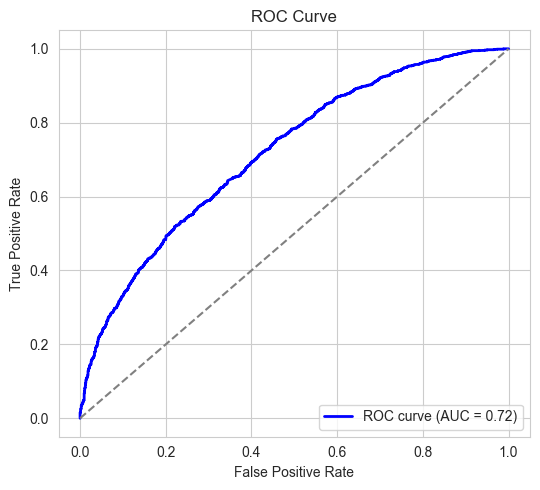

In [3]:
#Model sense les noves variables
explanatory_variables = ['white_rating', 'black_rating']
target_variable = "winner"

X = df[explanatory_variables]
y = df[target_variable]  # 1 = white, 0 = black

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

print("Logistic Regression")
metriques(log_model,X_test,y_test)
curva_ROC(log_model,X_test,y_test)

Gradient Boosting
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      1783
           1       0.66      0.71      0.68      1981

    accuracy                           0.65      3764
   macro avg       0.65      0.65      0.65      3764
weighted avg       0.65      0.65      0.65      3764

Accuracy: 0.6503719447396387


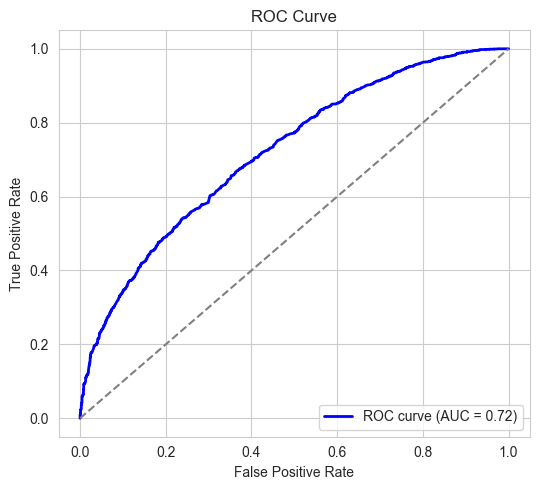

In [4]:
# previ també
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

print("Gradient Boosting")
metriques(gb_model,X_test,y_test)
curva_ROC(gb_model,X_test,y_test)

In [5]:
## NOS QUEDAMOS CON GRADIENT BOOSTING, SVM Y RANDOM FOREST (PARA VER SI MEJORA)

Gradient Boosting
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1783
           1       0.65      0.70      0.67      1981

    accuracy                           0.64      3764
   macro avg       0.64      0.64      0.64      3764
weighted avg       0.64      0.64      0.64      3764

Accuracy: 0.6447927736450585


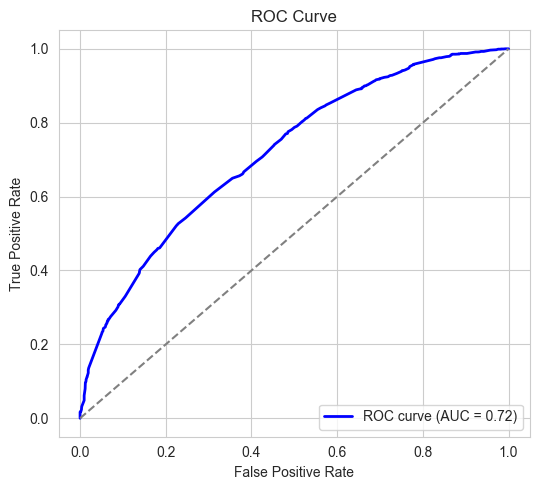

In [6]:
explanatory_variables = ['diff_rating']
target_variable = "winner"
X = df[explanatory_variables]
y = df[target_variable]  # 1 = white, 0 = black
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

print("Gradient Boosting")
metriques(gb_model,X_test,y_test)
curva_ROC(gb_model,X_test,y_test)

Afegim les variables creades

Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1783
           1       0.67      0.70      0.69      1981

    accuracy                           0.66      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.6625929861849097


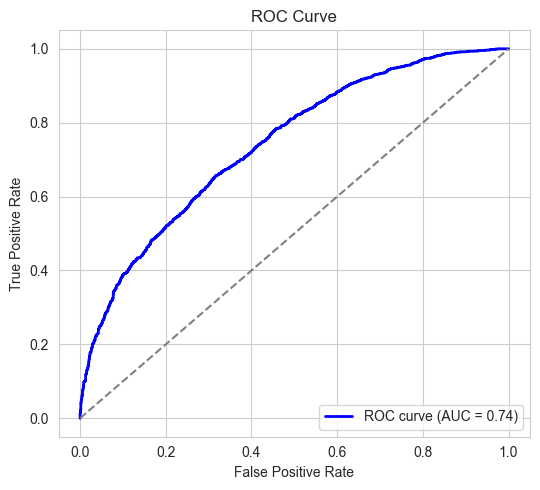

In [7]:
#Model amb només la diff_rating
explanatory_variables = ['diff_rating', 
                        'diff_global_winrate',
                        'vs_white_winrate', 'vs_prev_matches',
                        'diff_experience',
                        'diff_win_streak',
                        'diff_loss_streak']
target_variable = "winner"

X = df[explanatory_variables]
y = df[target_variable]  # 1 = white, 0 = black

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

print("Logistic Regression")
metriques(log_model,X_test,y_test)
curva_ROC(log_model,X_test,y_test)

SVM:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1783
           1       0.67      0.74      0.70      1981

    accuracy                           0.67      3764
   macro avg       0.67      0.66      0.66      3764
weighted avg       0.67      0.67      0.67      3764

Accuracy: 0.6679064824654622


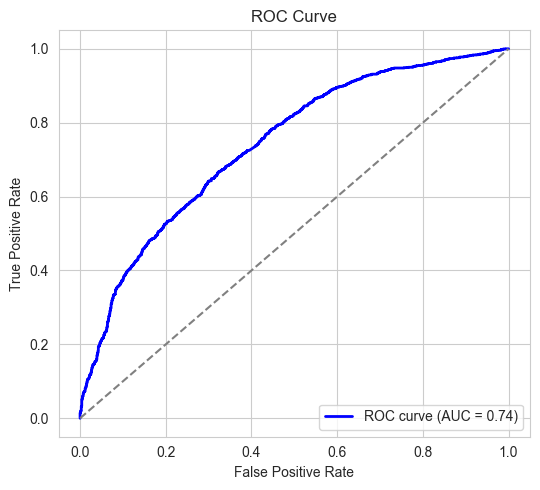

In [8]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

print("SVM:")
metriques(svm_model,X_test,y_test)
curva_ROC(svm_model,X_test,y_test)

Gradient Boosting
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      1783
           1       0.67      0.71      0.69      1981

    accuracy                           0.67      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.67      0.67      0.66      3764

Accuracy: 0.6655154091392136


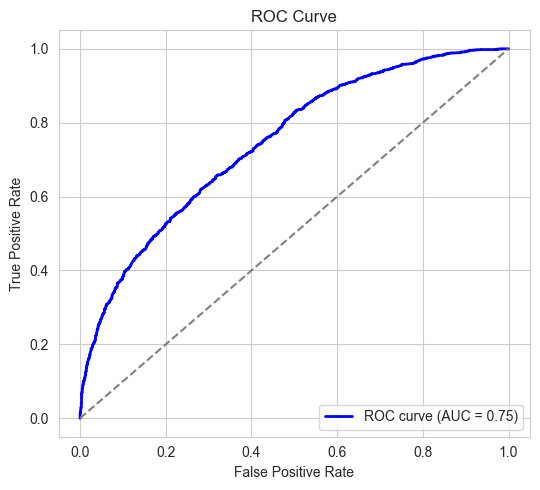

In [9]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

print("Gradient Boosting")
metriques(gb_model,X_test,y_test)
curva_ROC(gb_model,X_test,y_test)

Random Forest
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1783
           1       0.65      0.65      0.65      1981

    accuracy                           0.64      3764
   macro avg       0.63      0.63      0.63      3764
weighted avg       0.64      0.64      0.64      3764

Accuracy: 0.635759829968119


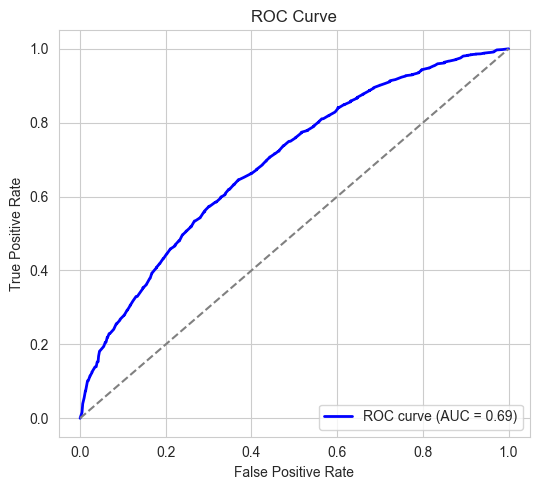

In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

print("Random Forest")
metriques(rf_model,X_test,y_test)
curva_ROC(rf_model,X_test,y_test)

In [11]:
## NOS QUEDAMOS CON GRADIENT BOOSTING, SVM Y RANDOM FOREST (PARA VER SI MEJORA)

## Model Selection amb Crossvalidation
  * Selecció del millor model
  * Cerca d'hiperparàmetres

Fem la cerca d'hiperparàmtres pels diferents models. DESCARTAR SVM¿?¿?

In [12]:
"""
gb_model = GradientBoostingClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=20,          # número de combinaciones aleatorias a probar
    scoring="accuracy", 
    cv=5,
    n_jobs=-1,
    verbose=2,
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros:")
print(random_search.best_params_)

# Evaluar mejor modelo
best_gb = random_search.best_estimator_
print("\nGradient Boosting (RandomizedSearchCV)")
metriques(best_gb, X_test, y_test)
curva_ROC(best_gb, X_test, y_test)
"""

'\ngb_model = GradientBoostingClassifier(random_state=42)\nparam_dist = {\n    \'n_estimators\': [100, 200, 300, 500, 800, 1000],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],\n    \'max_depth\': [2, 3, 4, 5, 6, 7, 8],\n    \'min_samples_split\': [2, 5, 10, 15, 20],\n    \'min_samples_leaf\': [1, 2, 5, 10, 15],\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'subsample\': [0.6, 0.7, 0.8, 0.9, 1.0]\n}\n\n# RandomizedSearchCV\nrandom_search = RandomizedSearchCV(\n    estimator=gb_model,\n    param_distributions=param_dist,\n    n_iter=20,          # número de combinaciones aleatorias a probar\n    scoring="accuracy", \n    cv=5,\n    n_jobs=-1,\n    verbose=2,\n)\n\nrandom_search.fit(X_train, y_train)\n\n# Mejores hiperparámetros\nprint("Mejores hiperparámetros:")\nprint(random_search.best_params_)\n\n# Evaluar mejor modelo\nbest_gb = random_search.best_estimator_\nprint("\nGradient Boosting (RandomizedSearchCV)")\nmetriques(best_gb, X_test, y_test)\ncurva_ROC(best_

In [13]:
"""
rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    #n_iter=50,           # número de combinaciones aleatorias a probar
    scoring="accuracy", 
    cv=5,
    n_jobs=-1,
    verbose=2,
)

random_search_rf.fit(X_train, y_train)

print("Mejores hiperparámetros Random Forest:")
print(random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_

print("\nRandom Forest (RandomizedSearchCV)")
metriques(best_rf, X_test, y_test)
curva_ROC(best_rf, X_test, y_test)
"""

'\nrf_model = RandomForestClassifier(random_state=42)\n\nparam_dist = {\n    "n_estimators": [100, 200, 300, 400],\n    "max_depth": [None, 5, 10, 20],\n    "min_samples_split": [2, 5, 10],\n    "min_samples_leaf": [1, 2, 4],\n    "max_features": ["auto", "sqrt", "log2"],\n    "bootstrap": [True, False]\n}\n\nrandom_search_rf = RandomizedSearchCV(\n    estimator=rf_model,\n    param_distributions=param_dist,\n    #n_iter=50,           # número de combinaciones aleatorias a probar\n    scoring="accuracy", \n    cv=5,\n    n_jobs=-1,\n    verbose=2,\n)\n\nrandom_search_rf.fit(X_train, y_train)\n\nprint("Mejores hiperparámetros Random Forest:")\nprint(random_search_rf.best_params_)\n\nbest_rf = random_search_rf.best_estimator_\n\nprint("\nRandom Forest (RandomizedSearchCV)")\nmetriques(best_rf, X_test, y_test)\ncurva_ROC(best_rf, X_test, y_test)\n'

In [14]:
#CROSS VALIDATION DE SVM

ARREGLAR Y PONER BIEN LOS CROSS VALIDATIONS Y ENSEÑAR EL MODELO FINAL CON TODAS LAS GRAFICAS